In [2]:
# python==3.8

import os
from pyannote.audio import Pipeline
from pyannote.core import Annotation, Segment, notebook

import matplotlib.pyplot as plt

pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

# apply pretrained pipeline
dir = os.path.dirname(os.getcwd())
WAV_FILE = dir + '/audios/record-672279722.51811.wav'
diarization = pipeline(WAV_FILE)

# print the result
result = []
for turn, _, speaker in diarization.itertracks(yield_label=True):
    # print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")
    result.append([float("{:.1f}".format(turn.start)), float("{:.1f}".format(turn.end)),speaker])


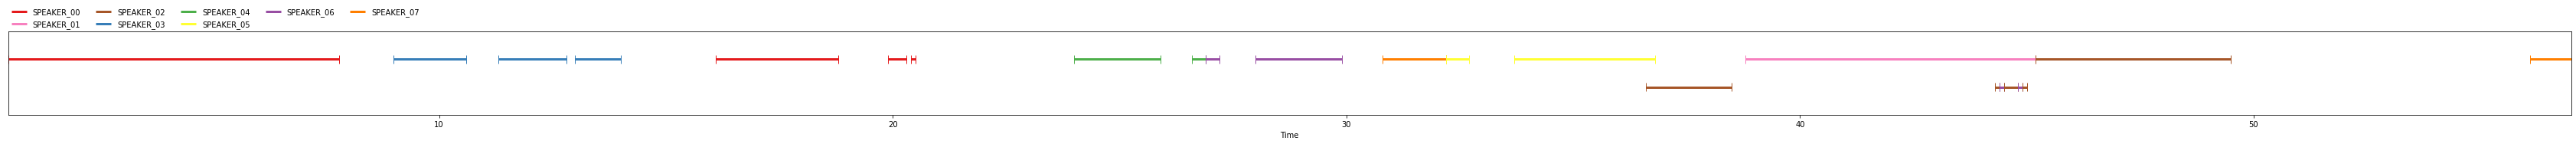

In [8]:
# Producing annotation graph
annotation = Annotation()
for i in result:
    annotation[Segment(i[0], i[1])] = i[2]

notebook.width = 60
plt.rcParams['figure.figsize'] = (notebook.width, 4)


annotation